<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/0-xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### XGBoosting

https://nbviewer.jupyter.org/github/jphall663/interpretable_machine_learning_with_python/blob/master/xgboost_pdp_ice.ipynb?flush_cache=trueXGBoosting


In [2]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling

#### Import data and clean

In [3]:
df = pd.read_csv('credit_cards_dataset.csv')

In [4]:
X = df.drop(['ID', 'default.payment.next.month'], axis=1).values

In [5]:
Y = df['default.payment.next.month'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Setting Parameter
https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [8]:
import xgboost as xgb                # gradient boosting machines (GBMs)

In [ ]:
# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas DataFrames

dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test, Y_test)

# used to calibrate predictions to mean of y
base_y = Y_train.mean()

# tuning parameters
params = {
    'objective': 'binary:logistic',             # produces 0-1 probabilities for binary classification
    'booster': 'gbtree',                        # base learner will be decision tree
    'eval_metric': 'auc',                       # stop training based on maximum AUC, AUC always between 0-1
    'eta': 0.08,                                # learning rate
    'subsample': 0.9,                           # use 90% of rows in each decision tree
    'colsample_bytree': 0.9,                    # use 90% of columns in each decision tree
    'max_depth': 15,                            # allow decision trees to grow to depth of 15
    'base_score': base_y,                       # calibrate predictions to mean of y 
    'seed': 42                               # set random seed for reproducibility
}

# watchlist is used for early stopping
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# train model
xgb_model = xgb.train(params, dtrain,1000, watchlist, early_stopping_rounds=50)

In [10]:
ypred=xgb_model.predict(dtest) # , iteration_range=(0, xgb_model.best_iteration)

In [11]:
#ypred = xgb_model.predict(dtest, pred_contribs=True, ntree_limit=xgb_model.best_ntree_limit)

In [12]:
ypred.reshape(-1,1)

array([[0.22066787],
       [0.07530385],
       [0.26205468],
       ...,
       [0.16485666],
       [0.03625066],
       [0.01675919]], dtype=float32)

In [13]:
predictions = np.array([np.round(value) for value in ypred])

In [14]:
predictions.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [15]:
predictions.sum()

1146.0

In [16]:
predictions.shape

(9000,)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

accuracy = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

In [18]:
print(accuracy)
print(cm)
print(precision)
print(recall)

0.8144444444444444
[[6612  428]
 [1242  718]]
0.6265270506108203
0.3663265306122449


In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6612  428]
 [1242  718]]


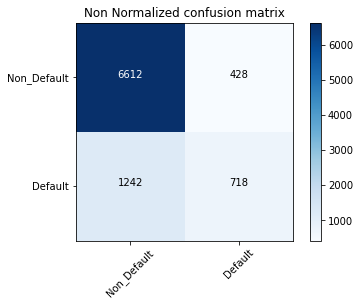

In [20]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')
#plt.show()